In [17]:
import pandas as pd
import numpy as np
import networkx as nx

In [37]:
dfNodes = pd.read_csv("fb-pages-company.nodes", sep=',')
dfEdges = pd.read_csv("fb-pages-company.edges", sep=',')

In [38]:
dfNodes.drop(["id"], axis=1, inplace=True)

In [39]:
dfNodes

,name,new_id
0,ALDI Australia,11192
1,Wetpaint,10743
2,Q102.7 KBIQ,13087
3,"Paraná TV, Bom Dia PR e G1 PR",12630
4,easyJet,7453
...,...,...
14108,Hay House,5367
14109,Sunday Kiss,12638
14110,American Express,8695
14111,New York Style,159


In [40]:
dfEdges

,node_1,node_2
0,0,2243
1,0,12084
2,0,6169
3,0,4887
4,0,3694
...,...,...
52305,10331,10331
52306,14056,14056
52307,14060,14074
52308,14064,14087


In [41]:
G = nx.Graph()

# Add nodes to the graph from the nodes CSV
for _, row in dfNodes.iterrows():
    # You can add additional node attributes like 'label' here if desired
    G.add_node(row['new_id'], label=row['name'])

# Add edges to the graph from the edges CSV
for _, row in dfEdges.iterrows():
    # You can add additional edge attributes like 'weight' here if desired
    G.add_edge(row['node_1'], row['node_2'])

# Now the graph G is built using data from both CSV files
print("Nodes in graph:", G.nodes(data=True))
print("Edges in graph:", G.edges(data=True))


Nodes in graph: [(11192, {'label': 'ALDI Australia'}), (10743, {'label': 'Wetpaint'}), (13087, {'label': 'Q102.7 KBIQ'}), (12630, {'label': 'Paraná TV, Bom Dia PR e G1 PR'}), (7453, {'label': 'easyJet'}), (4882, {'label': 'RTL Nieuws'}), (14102, {'label': 'Tasty Vegetarian'}), (111, {'label': 'NewsRadio 1110 KFAB'}), (11863, {'label': 'Sears Auto Center'}), (14031, {'label': 'Gemini Music'}), (5589, {'label': 'India.Com - Hindi'}), (13712, {'label': 'Telia Finland'}), (6904, {'label': 'Metro Soaps'}), (10548, {'label': 'Totalplay'}), (8356, {'label': 'Johnsonville'}), (12416, {'label': 'PBS NewsHour'}), (5565, {'label': 'Gatorade'}), (1549, {'label': 'ENGIE'}), (4906, {'label': 'WLNS-TV'}), (7522, {'label': 'Suunto'}), (11870, {'label': 'UPC Polska'}), (3845, {'label': 'Callebaut'}), (3557, {'label': 'Telegraph Travel'}), (7609, {'label': 'El Partidazo de COPE'}), (2299, {'label': 'MTN Nigeria'}), (3641, {'label': 'Moldcell'}), (13416, {'label': 'Legendary'}), (1411, {'label': 'Decathl

In [23]:
def save_graph_as_table(list_of_graphs):
    """
    Create a table with various graph properties for each graph in the list.
    """
    values = []
    for G in list_of_graphs:
        # Number of nodes and edges
        num_nodes = G.number_of_nodes()
        num_edges = G.number_of_edges()
        
        # Average degree
        avg_degree = 2 * num_edges / num_nodes if num_nodes > 0 else 0
        
        # Density
        density = nx.density(G)
        
        # Connected components
        components = [len(c) for c in nx.connected_components(G)]
        num_components = len(components)
        largest_component_size = max(components) if components else 0
        
        # Diameter of the largest component (if applicable)
        if num_components > 1:
            largest_component = max(nx.connected_components(G), key=len)
            subgraph = G.subgraph(largest_component)
            diameter = nx.diameter(subgraph) if nx.is_connected(subgraph) else float('inf')
        else:
            diameter = nx.diameter(G) if nx.is_connected(G) else float('inf')
        
        # Average path length (computed per component)
        try:
            avg_path_length = nx.average_shortest_path_length(G)
        except nx.NetworkXError:
            avg_path_length = float('inf')
        
        # Clustering coefficient
        clustering_coefficient = nx.average_clustering(G)
        
        # Degree distribution (list of degrees of all nodes)
        degree_distribution = [d for _, d in G.degree()]
        
        # Community structure
        communities = list(nx.community.greedy_modularity_communities(G))
        modularity = nx.algorithms.community.modularity(G, communities)
        
        # Centralities
        degree_centrality = nx.degree_centrality(G)
        betweenness_centrality = nx.betweenness_centrality(G)
        
        # Adding all data to a dictionary for the table row
        values.append({
            "Vrcholy": num_nodes,
            "Hrany": num_edges,
            "Průměrný stupeň": avg_degree,
            "Hustota": density,
            "Komponenty": num_components,
            "Velikosti komponentů": components,
            "Největší velikost komponentu": largest_component_size,
            "Průměr": diameter,
            "Průměrná délka cesty": avg_path_length,
            "Clustering Coefficient": clustering_coefficient,
            "Distribuce stupňů": degree_distribution,
            "Modularita": modularity,
            "Degree Centrality": degree_centrality,
            "Betweenness Centrality": betweenness_centrality
        })
    
    # Convert the list of dictionaries into a pandas DataFrame for tabular representation
    table = pd.DataFrame(values)
    display(table)
    
    table.to_csv("graph_metricsBA.csv", index=False)

In [24]:
save_graph_as_table([G])

,Vrcholy,Hrany,Průměrný stupeň,Hustota,Komponenty,Velikosti komponentů,Největší velikost komponentu,Průměr,Průměrná délka cesty,Clustering Coefficient,Distribuce stupňů,Modularita,Degree Centrality,Betweenness Centrality
0,14113,52310,7.413023,0.000525,1,[14113],14113,15,5.310198,0.239242,"[11, 2, 4, 1, 10, 6, 2, 3, 9, 1, 3, 7, 1, 8, 9...",0.661128,"{11192: 0.0007794784580498867, 10743: 0.000141...","{11192: 0.00015342507297274374, 10743: 1.02385..."


In [25]:
table = pd.read_csv("graph_metricsBA.csv")


In [26]:
# Počet vrcholů
num_nodes = G.number_of_nodes()

# Počet hran
num_edges = G.number_of_edges()

# Hustota grafu
density = nx.density(G)

print(f"Počet vrcholů: {num_nodes}")
print(f"Počet hran: {num_edges}")
print(f"Hustota grafu: {density:.4f}")


Počet vrcholů: 14113
Počet hran: 52310
Hustota grafu: 0.0005


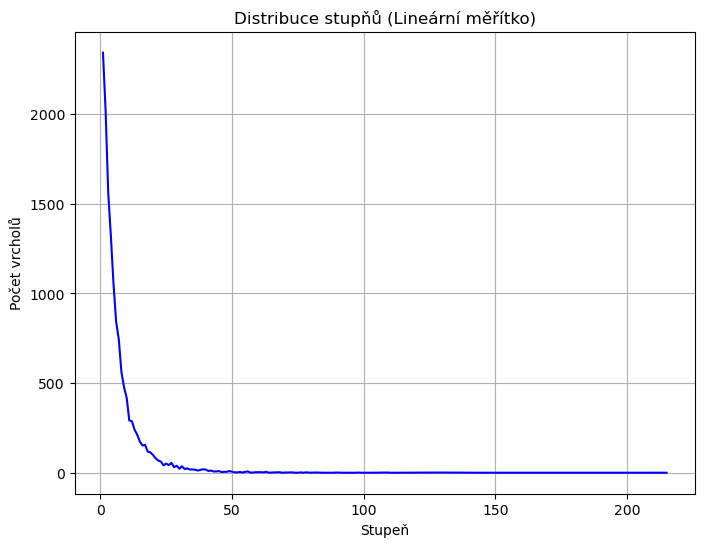

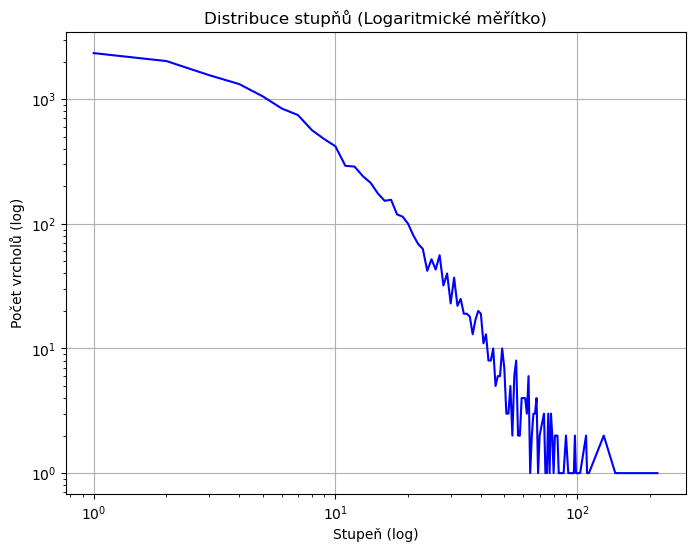

Průměrný stupeň: 7.41
Maximální stupeň: 215


In [27]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Počet vrcholů
num_nodes = G.number_of_nodes()

# Počet hran
num_edges = G.number_of_edges()

# Distribuce stupňů (počet vrcholů pro každý stupeň)
degree_distribution = [d for n, d in G.degree()]

# Počítání frekvence každého stupně
degree_count = Counter(degree_distribution)

# Seřazení podle stupně
degree_values = sorted(degree_count.keys())
frequency_values = [degree_count[d] for d in degree_values]

# Průměrný stupeň
avg_degree = sum(degree_distribution) / num_nodes

# Maximální stupeň
max_degree = max(degree_distribution)

# Vizualizace distribuce stupňů v lineárním měřítku (line plot)
plt.figure(figsize=(8, 6))
plt.plot(degree_values, frequency_values, linestyle='-', color='b')
plt.title('Distribuce stupňů (Lineární měřítko)')
plt.xlabel('Stupeň')
plt.ylabel('Počet vrcholů')
plt.grid(True)
plt.show()

# Vizualizace distribuce stupňů v logaritmickém měřítku (line plot)
plt.figure(figsize=(8, 6))
plt.plot(degree_values, frequency_values, linestyle='-', color='b')
plt.xscale('log')  # Logaritmické měřítko na ose X
plt.yscale('log')  # Logaritmické měřítko na ose Y
plt.title('Distribuce stupňů (Logaritmické měřítko)')
plt.xlabel('Stupeň (log)')
plt.ylabel('Počet vrcholů (log)')
plt.grid(True)
plt.show()

# Výpis průměrného a maximálního stupně
print(f"Průměrný stupeň: {avg_degree:.2f}")
print(f"Maximální stupeň: {max_degree}")


In [28]:
# Centrálnost podle stupně (Degree Centrality)
degree_centrality = nx.degree_centrality(G)

# Centrálnost podle betweenness (Betweenness Centrality)
betweenness_centrality = nx.betweenness_centrality(G)

# Centrálnost podle closeness (Closeness Centrality)
#closeness_centrality = nx.closeness_centrality(G)

# Centrálnost podle eigenvector (Eigenvector Centrality)
#eigenvector_centrality = nx.eigenvector_centrality(G)

# Výpis prvních několika hodnot centrality
print("Nejvíce centrální vrcholy podle Degree Centrality:")
print(sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5])


Nejvíce centrální vrcholy podle Degree Centrality:
[(8396, 0.015235260770975057), (11934, 0.015022675736961451), (856, 0.01403061224489796), (11380, 0.013747165532879819), (9886, 0.013109410430839002)]


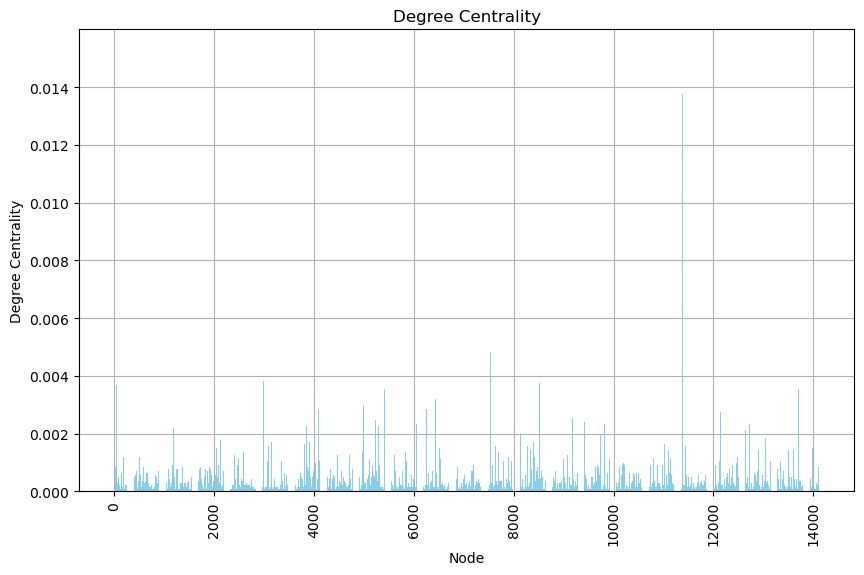

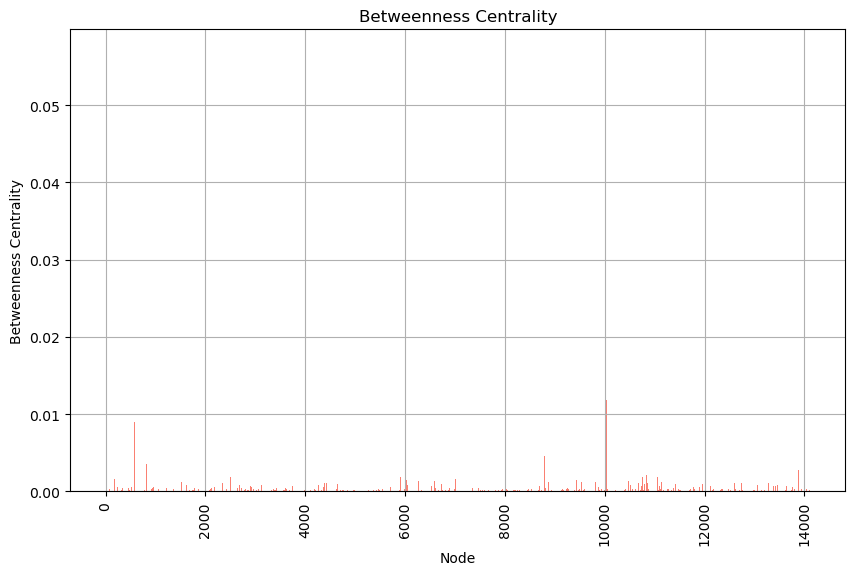

In [29]:
# Get lists of nodes and their corresponding centrality values
nodes = list(G.nodes())
degree_values = list(degree_centrality.values())
betweenness_values = list(betweenness_centrality.values())

# Plot Degree Centrality
plt.figure(figsize=(10, 6))
plt.bar(nodes, degree_values, color='skyblue')
plt.title("Degree Centrality")
plt.xlabel("Node")
plt.ylabel("Degree Centrality")
plt.xticks(rotation=90)  # Rotate node labels for better readability
plt.grid(True)
plt.show()

# Plot Betweenness Centrality
plt.figure(figsize=(10, 6))
plt.bar(nodes, betweenness_values, color='salmon')
plt.title("Betweenness Centrality")
plt.xlabel("Node")
plt.ylabel("Betweenness Centrality")
plt.xticks(rotation=90)  # Rotate node labels for better readability
plt.grid(True)
plt.show()

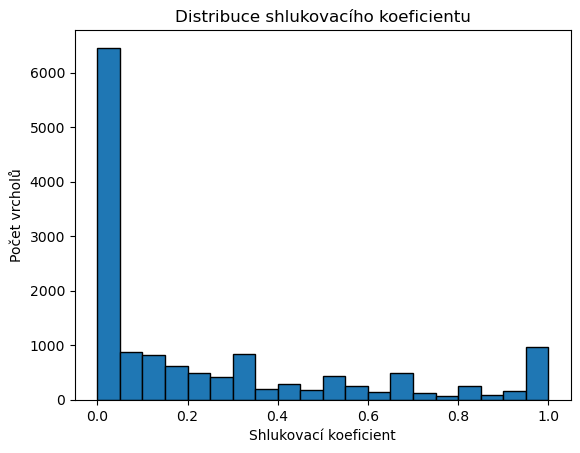

Průměrný shlukovací koeficient: 0.2392


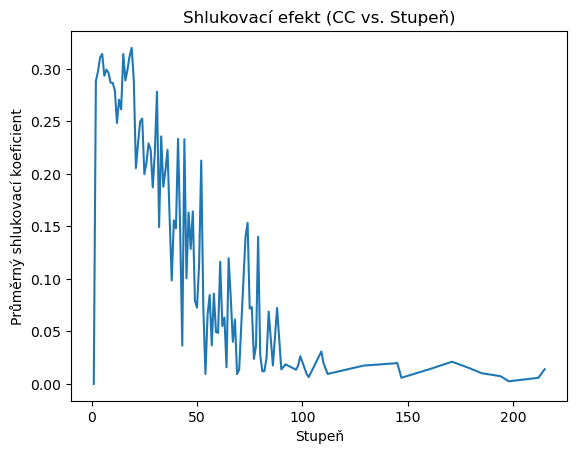

In [30]:
# Průměrný shlukovací koeficient
avg_clustering = nx.average_clustering(G)

# Shlukovací koeficient pro jednotlivé vrcholy
clustering_coeffs = nx.clustering(G)

# Vizualizace distribuce shlukovacího koeficientu
plt.hist(list(clustering_coeffs.values()), bins=20, edgecolor='black')
plt.title('Distribuce shlukovacího koeficientu')
plt.xlabel('Shlukovací koeficient')
plt.ylabel('Počet vrcholů')
plt.show()

print(f"Průměrný shlukovací koeficient: {avg_clustering:.4f}")

# Shlukovací efekt – průměrný CC pro různé stupně
degrees = list(dict(G.degree()).values())
avg_cc_by_degree = {}
for degree in set(degrees):
    nodes_with_degree = [n for n, d in G.degree() if d == degree]
    avg_cc_by_degree[degree] = sum(clustering_coeffs[n] for n in nodes_with_degree) / len(nodes_with_degree)

# Vizualizace shlukovacího efektu
degrees_sorted = sorted(avg_cc_by_degree.items())
degree_vals, cc_vals = zip(*degrees_sorted)

plt.plot(degree_vals, cc_vals)
plt.title('Shlukovací efekt (CC vs. Stupeň)')
plt.xlabel('Stupeň')
plt.ylabel('Průměrný shlukovací koeficient')
plt.show()


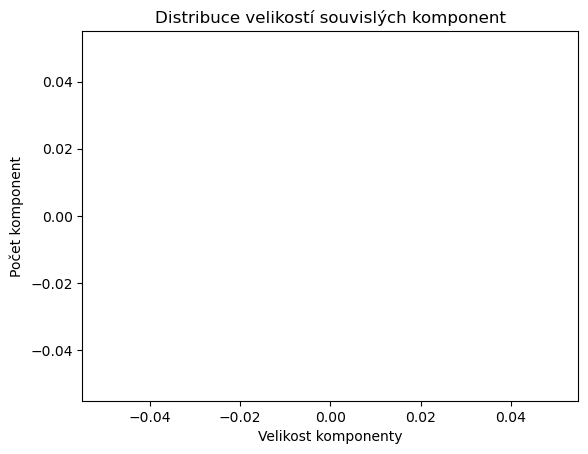

Počet souvislých komponent: 1


In [31]:
# Počet souvislých komponent
connected_components = list(nx.connected_components(G))
num_components = len(connected_components)

# Distribuce velikostí souvislých komponent
component_sizes = [len(component) for component in connected_components]

# Vizualizace distribuce velikostí souvislých komponent
plt.hist(component_sizes, bins=range(min(component_sizes), max(component_sizes) + 1), edgecolor='black')
plt.title('Distribuce velikostí souvislých komponent')
plt.xlabel('Velikost komponenty')
plt.ylabel('Počet komponent')
plt.show()

print(f"Počet souvislých komponent: {num_components}")


In [32]:
import networkx as nx
import community as community_louvain

# Detekce komunit pomocí Louvain metody
partition = community_louvain.best_partition(G)

# Rozdělení komunit podle Louvain metody
communities = list(nx.community.louvain_communities(G))

# Počet komunit
num_communities = len(communities)

# Velikosti komunit
community_sizes = [len(community) for community in communities]

# Modularita
modularity = community_louvain.modularity(partition, G)

# Výpis výsledků
print(f"Počet komunit: {num_communities}")
print(f"Modularita: {modularity:.4f}")
print(f"Velikosti komunit: {community_sizes}")
print(f"Minimální velikost komunity: {min(community_sizes)}")
print(f"Průměrná velikost komunity: {sum(community_sizes) / num_communities:.2f}")
print(f"Maximální velikost komunity: {max(community_sizes)}")

# Vizualizace velikostí komunit
import matplotlib.pyplot as plt

plt.hist(community_sizes, bins=range(min(community_sizes), max(community_sizes) + 1), edgecolor='black')
plt.title('Distribuce velikostí komunit')
plt.xlabel('Velikost komunity')
plt.ylabel('Počet komunit')
plt.show()


AttributeError: module 'community' has no attribute 'best_partition'

In [66]:
import networkx as nx
from networkx.algorithms import community


# Function to calculate modularity
def calculate_modularity(G, communities):
    return community.modularity(G, [set(c) for c in communities])

# Analysis function
def analyze_communities(G, communities, method_name):
    num_communities = len(communities)
    community_sizes = [len(c) for c in communities]
    avg_size = np.mean(community_sizes)
    min_size = np.min(community_sizes)
    max_size = np.max(community_sizes)
    modularity = calculate_modularity(G, communities)

    print(f"\n{method_name} Analysis:")
    print(f"Number of communities: {num_communities}")
    print(f"Average community size: {avg_size:.2f}")
    print(f"Minimum community size: {min_size}")
    print(f"Maximum community size: {max_size}")
    print(f"Modularity: {modularity:.4f}")
    print(community_sizes)
    # Step 2: Create lineplot for community size distribution
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, len(community_sizes) + 1), community_sizes, linestyle='-', color='b')
    plt.title("Distribuce velikostí komunit")
    plt.xlabel("ID komunity")
    plt.ylabel("Velikost komunity")
    plt.grid(True)
    plt.show()



In [64]:
louvain = nx.community.louvain_communities(G, seed=123)


Louvain Analysis:
Number of communities: 70
Average community size: 201.61
Minimum community size: 4
Maximum community size: 1631
Modularity: 0.7221
[76, 406, 195, 1073, 113, 45, 13, 110, 328, 240, 8, 209, 84, 88, 7, 116, 95, 212, 141, 55, 80, 37, 6, 155, 12, 134, 116, 7, 88, 102, 141, 4, 186, 7, 9, 11, 100, 178, 141, 787, 115, 64, 213, 10, 1020, 101, 87, 701, 147, 480, 90, 115, 159, 1631, 13, 241, 14, 20, 342, 114, 90, 163, 95, 732, 128, 68, 286, 474, 226, 259]


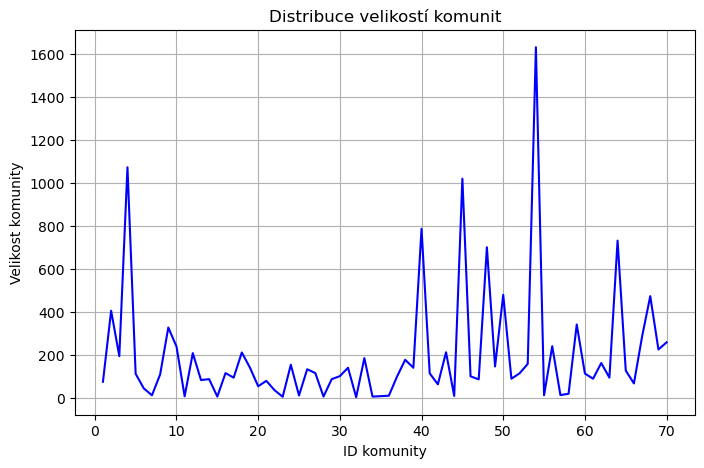

In [67]:
analyze_communities(G, louvain, "Louvain")